In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

In [2]:
df = pd.read_csv('heart_2020_cleaned.csv')

In [3]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [4]:
df.dropna(inplace=True)

In [5]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [6]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


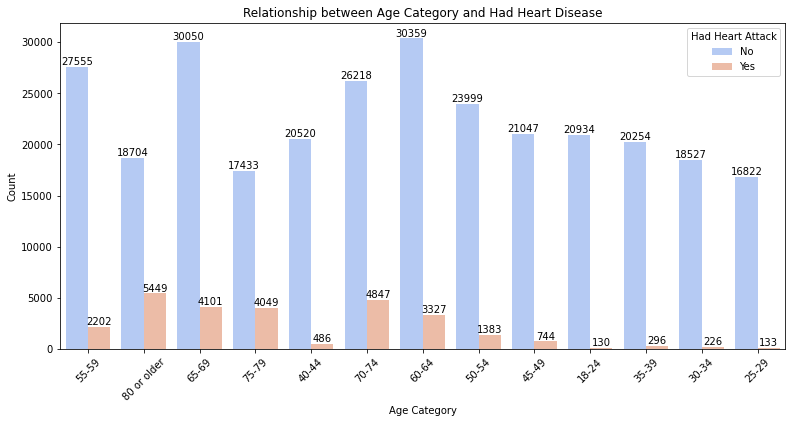

In [7]:
def plot_age_vs_heart_attack(df):
    """
    Plot a count plot to show the relationship between age category and Heart Disease occurrence.

    Parameters:
    Input dataframe containing 'AgeCategory' and 'HeartDisease' columns.

    Returns:
    Displays the count plot.
    """
    plt.figure(figsize=(13, 6))
    ax = sns.countplot(x='AgeCategory', hue='HeartDisease', data=df, palette='coolwarm')
    plt.xlabel('Age Category')
    plt.ylabel('Count')
    plt.title('Relationship between Age Category and Had Heart Disease')
    plt.legend(title='Had Heart Attack', loc='upper right')
    plt.xticks(rotation=45)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 5), 
                    textcoords = 'offset points')
    plt.show()
    
    
plot_age_vs_heart_attack(df)

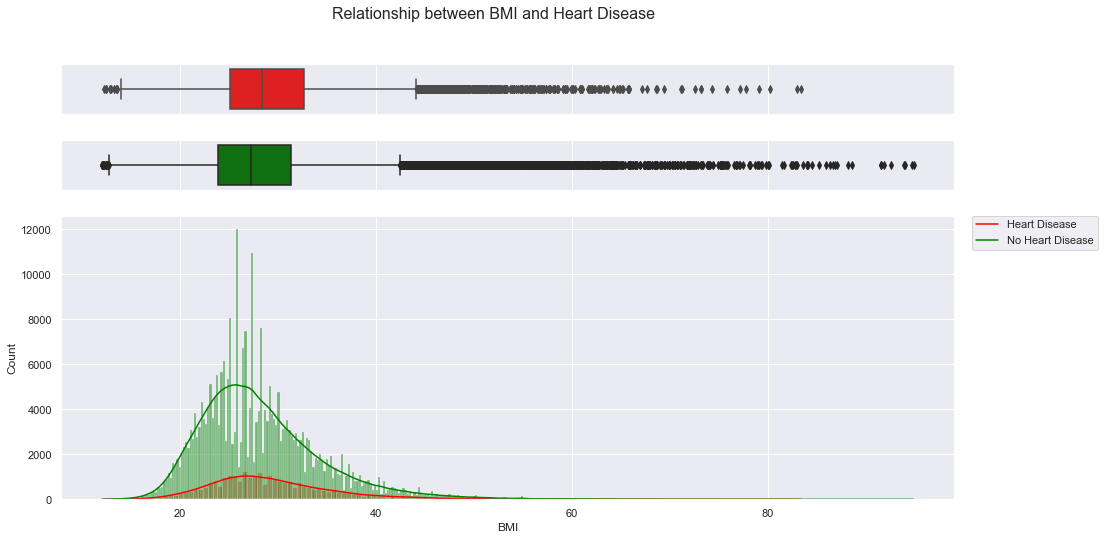

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_bmi_vs_heart_attack(df):
    """
    Plot boxplots and histograms to show the relationship between BMI and Heart Disease occurrence.

    Parameters:
    Input dataframe containing 'BMI' and 'HeartDisease' columns.

    Returns:
    Displays the boxplots and histograms.
    """
    sns.set(style="darkgrid")
    sns.set(rc={'figure.figsize':(16,8)})
    f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})
    sns.boxplot(x=df[df['HeartDisease']=='Yes']["BMI"], ax=ax_box1, color="red")
    sns.histplot(df[df['HeartDisease']=='Yes'], x="BMI", ax=ax_hist, kde=True, color="red")
    sns.boxplot(x=df[df['HeartDisease']=='No']["BMI"], ax=ax_box2, color='green')
    sns.histplot(df[df['HeartDisease']=='No'], x="BMI", ax=ax_hist, kde=True, color='green')
    ax_box1.set(xlabel='')
    ax_box2.set(xlabel='')
    plt.legend(title='', loc=2, labels=['Heart Disease', 'No Heart Disease'],bbox_to_anchor=(1.02, 1), borderaxespad=0.)
    plt.suptitle('Relationship between BMI and Heart Disease', fontsize=16)
    plt.show()


plot_bmi_vs_heart_attack(df)

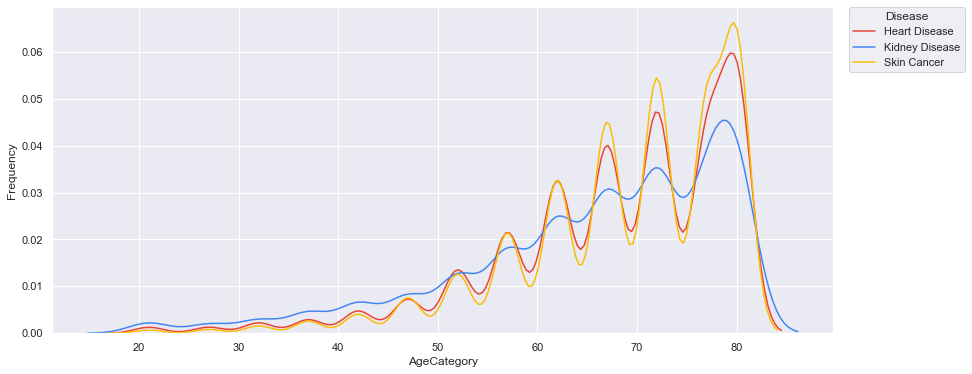

In [9]:
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
df['AgeCategory'] = df['AgeCategory'].apply(lambda x: encode_AgeCategory[x])
df['AgeCategory'] = df['AgeCategory'].astype('float')


def plot_kde(df):
    """
    Plot KDE plots for diseases by age category.

    Parameters:
    Input dataframe containing columns 'AgeCategory', 'HeartDisease', 'KidneyDisease', and 'SkinCancer'.

    Returns:
    Displays the KDE plots.
    """
    fig, ax = plt.subplots(figsize=(14, 6))
    sns.kdeplot(df[df["HeartDisease"]=='Yes']["AgeCategory"], alpha=1, shade=False, color="#ea4335", label="Heart Disease", ax=ax)
    sns.kdeplot(df[df["KidneyDisease"]=='Yes']["AgeCategory"], alpha=1, shade=False, color="#4285f4", label="Kidney Disease", ax=ax)
    sns.kdeplot(df[df["SkinCancer"]=='Yes']["AgeCategory"], alpha=1, shade=False, color="#fbbc05", label="Skin Cancer", ax=ax)
    ax.set_xlabel("AgeCategory")
    ax.set_ylabel("Frequency")
    ax.legend(title='Disease', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
    plt.show()
    
    
plot_kde(df)

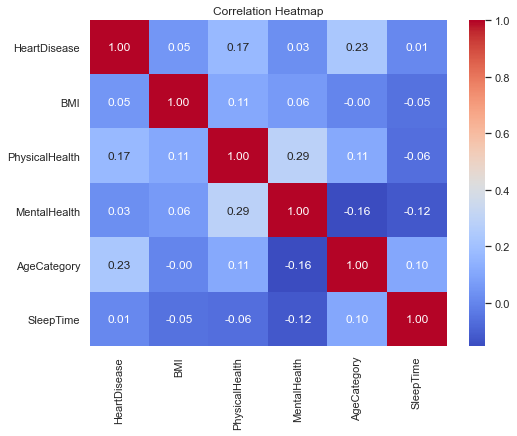

In [10]:
df['HeartDisease'] = df['HeartDisease'].map({'Yes': 1, 'No': 0})

def plot_correlation_heatmap(df):
    """
    Plot a correlation heatmap for the given DataFrame.

    Parameters:
    Input DataFrame for which correlation heatmap is to be plotted.

    Returns:
    Displays the correlation heatmap.
    """
    corr_matrix = df.corr(numeric_only=True)
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()
    
plot_correlation_heatmap(df)